# Introduction to numpy and matplotlib

In this tutorial, we'll focus on the two most important Python packages for scientific computing: **numpy** and **matplotlib**.  

First, a word about IPython: [IPython](http://www.ipython.org) is a collection of tools for interactive programming in [Python](http://www.python.org/).  Most importantly for us, IPython includes an interactive shell and a browser-based notebook.  The notebook (which you are using now) allows you to run Python code in your web browser; just click on a cell with code and hit shift+enter.

## Numpy
Python includes a package for numerical computation called numpy,  which will be an essential tool in this course. You may find the  following links helpful:  

- [Numpy tutorial](http://www.scipy.org/Tentative_NumPy_Tutorial) 
- [Numpy tutorial video](http://showmedo.com/videotutorials/series?name=i9KuJuNcG) 
- [NumPy: lock 'n load](http://mentat.za.net/numpy/intro/intro.html)

If you want something really exhaustive, read either of the books by Hans Petter Langtangen (KAUST has access to the e-books).  

To get started, we import the numpy module.  Import statements like this are the typical way of getting access to functions in Python.  Here we just import the numpy module and tell Python that we want to refer to numpy by the short abbreviation "np":

In [1]:
import numpy as np

### Arrays

The most important Numpy class is the <em>ndarray</em>, which is similar to an array in Matlab.  
Numpy includes basic utility functions for creating arrays that are similar to those in Matlab:

In [3]:
x = np.linspace(0,1,5)
print(x)

[ 0.    0.25  0.5   0.75  1.  ]


**Try changing the inputs to the *linspace* function and see if you can determine exactly what it does.**

In [5]:
y = np.arange(0,1,0.2)
print(y)

[ 0.   0.2  0.4  0.6  0.8]


**Try changing the inputs to the *arange* function to determine exactly what it does.**  Another way to find out what a function does is to type its name, followed by a question mark:

In [6]:
np.arange?

You can resize the help window (to get it out of your way) by dragging the divider.

The syntax for creating a multidimensional array in numpy is also similar to Matlab:  

In [7]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(A)
print(A.shape)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
(3, 3)


It's easy to manipulate arrays in various useful ways:  

In [9]:
B = np.arange(1,10)
print(B)
print(B.reshape((3,3)))

[1 2 3 4 5 6 7 8 9]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


Notice that there are two pairs of parentheses used when calling the reshape command, because we are passing as argument the Python tuple <em>(3,3)</em>, which is the shape of the resulting array.

### Indexing

You can slice numpy arrays just as in Fortran 90 or Matlab, but the indexing is a little different.  Can you figure out how it differs?  Try the examples below:

In [10]:
print(A[0,0])
print(A[1:3,0:2])

array([[4, 5],
       [7, 8]])

You can index in some slightly fancier ways, too:  

In [11]:
print(A[:,1:])
print(A[-1,:])

[[2 3]
 [5 6]
 [8 9]]
[7 8 9]


### Array and matrix multiplication
How does multiplication of arrays work? Let's see:  

In [13]:
M=A
print(M*M)

[[ 1  4  9]
 [16 25 36]
 [49 64 81]]


By default, numpy just multiplies componentwise. If you want to do matrix-matrix (or matrix-vector) multiplication, use the <em>dot</em> function:  

In [14]:
np.dot(M,M)

array([[ 30,  36,  42],
       [ 66,  81,  96],
       [102, 126, 150]])

### Linear algebra
What else can you do with ndarrays? Besides basic arithmetic, there is a nice linear algebra package:  

In [15]:
np.linalg?

In [16]:
np.linalg.norm(x)

1.3693063937629153

We can use this package to solve a linear system of equations: $Mx=b$

In [18]:
M = np.array([[0,2],[8,0]])
b = np.array([1,2])
print(M)
print(b)

[[0 2]
 [8 0]]
[1 2]


In [19]:
x = np.linalg.solve(M,b)
print(x)

[ 0.25  0.5 ]


**Can you think of an easy way to check that $x$ is the correct solution?  Program your check in the box below.**

We can also solve eigenvalue problems:

In [22]:
lam,V = np.linalg.eig(M)
print(lam)
print(V)

[ 4. -4.]
[[ 0.4472136  -0.4472136 ]
 [ 0.89442719  0.89442719]]


Notice how we have put two variables on the left of the equals sign, to assign the outputs of *eig()* to two different variables. What are the two outputs?  **How can you check that these outputs are correct?  Program it in the box below.**

## Matplotlib
For plotting we will use the [matplotlib](http://matplotlib.org/) package.

In [23]:
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


The line beginning with a "%" is referred to as a magic function.  It will make it so that our plots appear in the browser, rather than in a separate window.  If you want to know about all of IPython's magic functions, just type "%magic".

Now for a very simple example. Suppose we want to plot the function $\sin(\exp(x))$ on the interval $x\in(0,4)$. We'll want to use the numpy versions of the sine and exponential functions, which operate on arrays (the math module versions operate only on scalars):  

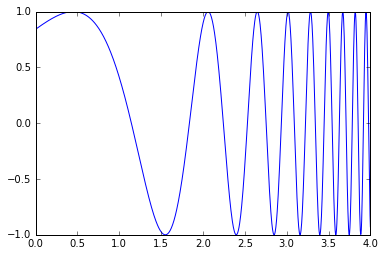

In [24]:
x=np.linspace(0,4,1000)
f=np.sin(np.exp(x))
plt.plot(x,f)

We won't spend much time on matplotlib. It's straightforward to use and you will generally only get into its advanced functionality if you are customizing the look of a plot for a publication. There is a nice matplotlib tutorial [here](http://matplotlib.sourceforge.net/users/pyplot_tutorial.html). The matplotlib documentation in general is excellent.  

### Listing functions
If you type the name of a Python variable or module, followed by a period, and press the Tab key, you'll get a list of many of the things you can do with that variable or module.  Try it out:

In [25]:
x.

SyntaxError: invalid syntax (<ipython-input-25-64a09567da13>, line 1)

In [ ]:
plt.


<strong>Gotcha: copies and views</strong>  
See if you can figure out what's happening in the following code.  

In [26]:
a = np.arange(12)
print(a)
b=a
b[5]=0
print(a)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 0  1  2  3  4  0  6  7  8  9 10 11]


**Try playing around with some of the things you found in the box below. See if you can do the following:  
1. Create a 10x10 matrix whose $(i,j)$ entry is equal to $i\times j$ without using a loop. Hint: use <em>np.fromfunction()</em>.  
2. Split your 10x10 matrix into five $10 \times 2$ matrices with one line of code. Hint: use <em>np.hsplit()</em>**

### A warning about speed

Like MATLAB, Python is **slow**! Like MATLAB, it is particularly slow when using **loops** with many iterations, nested loops, or deeply nested function calls.  For the exercises in this course, Python will be sufficiently fast as long as you don't use loops excessively.

For large-scale computational problems, you shouldn't use Python for any code that needs to be fast. Instead, you can write/generate code in C or Fortran and use weave, [cython](http://cython.org/), [f2py](http://www.f2py.com/), or other similar packages to automatically incorporate that code into your Python program.  

### Other packages
Besides numpy and matplotlib, there are many other useful Python packages for scientific computing. Here is a short list:  

- [scipy](http://www.scipy.org/) - optimization, ODEs, sparse linear algebra, etc.
- [sympy](http://sympy.org/) - symbolic computation
- [mpi4py](http://mpi4py.scipy.org/) - parallel computing
- [petsc4py](http://code.google.com/p/petsc4py/), [pytrilinos](http://trilinos.sandia.gov/packages/pytrilinos/) - Python bindings for the "big 2" parallel scientific libraries
- [pyCUDA](http://mathema.tician.de/software/pycuda), [pyOpenCL](http://mathema.tician.de/software/pyopencl) - GPGPU computing
- [FENiCS](http://fenicsproject.org/), [FiPy](http://www.ctcms.nist.gov/fipy/), [PyClaw](http://numerics.kaust.edu.sa/pyclaw/) - solve complicated PDEs with very sophisticated numerical methods
- [networkX](http://networkx.github.com/), [pygraphviz](http://networkx.lanl.gov/pygraphviz/) - graphs